In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
dataset = pd.read_csv('reviews.csv', delimiter=',')
dataset.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
print(dataset.columns)


Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')


In [ ]:
features = ['Review','Rating']
dataset = dataset[features]

In [ ]:
print(f"Jumlah data duplikat: {dataset.duplicated().sum()}")  # Cek duplikat
print(f"Jumlah data missing value: {dataset.isnull().sum()}")  # Cek Mising

Jumlah data duplikat: 201
Jumlah data missing value: Review    0
Rating    0
dtype: int64


In [ ]:
# Menghapus data duplikat
dataset = dataset.drop_duplicates()
#cek apakah masih ada data yang duplikat
print(f"Jumlah data duplikat setelah di cleansing: {dataset.duplicated().sum()}")  # Cek duplikat

Jumlah data duplikat setelah di cleansing: 0


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Unduh paket data NLTK yang dibutuhkan
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Unduh data punkt_tab yang hilang

# Inisialisasi tools NLP
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Normalisasi: Ubah ke huruf kecil
    text = text.lower()
    # Hapus karakter non-alfabet
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenisasi
    words = word_tokenize(text)
    # Hapus stop words dan lakukan lemmatization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Terapkan preprocessing
dataset['Review'].apply(preprocess_text)
print(dataset[['Review']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              Review
0  Great music service, the audio is high quality...
1  Please ignore previous negative rating. This a...
2  This pop-up "Get the best Spotify experience o...
3    Really buggy and terrible to use as of recently
4  Dear Spotify why do I get songs that I didn't ...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61393 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61393 non-null  object
 1   Rating  61393 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [ ]:
dataset

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['Review'])
sequences = tokenizer.texts_to_sequences(dataset['Review'])

# Padding sequences
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

# Label encoding
y = dataset['Rating'].apply(lambda x: 1 if x > 3 else 0).values  # Rating > 3 dianggap positif

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model LSTM
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output untuk klasifikasi biner
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1540/1540 ━━━━━━━━━━━━━━━━━━━━ 359s 230ms/step - accuracy: 0.8144 - loss: 0.4140 - val_accuracy: 0.8739 - val_loss: 0.3145
Epoch 2/5
1540/1540 ━━━━━━━━━━━━━━━━━━━━ 396s 240ms/step - accuracy: 0.8954 - loss: 0.2698 - val_accuracy: 0.8648 - val_loss: 0.3336
Epoch 3/5
1540/1540 ━━━━━━━━━━━━━━━━━━━━ 382s 240ms/step - accuracy: 0.9125 - loss: 0.2267 - val_accuracy: 0.8695 - val_loss: 0.3280
Epoch 4/5
1540/1540 ━━━━━━━━━━━━━━━━━━━━ 370s 232ms/step - accuracy: 0.9280 - loss: 0.1910 - val_accuracy: 0.8673 - val_loss: 0.3567
Epoch 5/5
1540/1540 ━━━━━━━━━━━━━━━━━━━━ 356s 231ms/step - accuracy: 0.9378 - loss: 0.1636 - val_accuracy: 0.8669 - val_loss: 0.3727


385/385 ━━━━━━━━━━━━━━━━━━━━ 28s 71ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6321
           1       0.87      0.85      0.86      5998

    accuracy                           0.87     12319
   macro avg       0.87      0.87      0.87     12319
weighted avg       0.87      0.87      0.87     12319



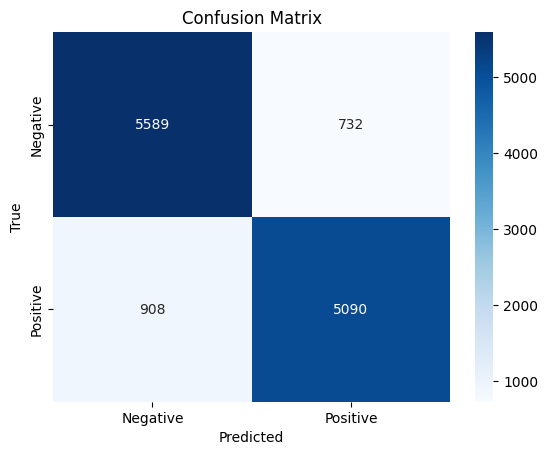

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi pada data test
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluasi
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Fungsi untuk prediksi sentimen berdasarkan model yang sudah dilatih
def predict_sentiment(review_text):
    # Preprocessing review (seperti yang dilakukan pada data training)
    review_text_processed = preprocess_text(review_text)  # Menggunakan fungsi preprocess_text yang sudah ada

    # Tokenisasi dan padding review baru
    sequence = tokenizer.texts_to_sequences([review_text_processed])
    padded_sequence = pad_sequences(sequence, maxlen=100)  # Sesuaikan dengan panjang maksimal yang digunakan pada model

    # Prediksi sentimen (output sigmoid: 0 untuk negatif, 1 untuk positif)
    sentiment = model.predict(padded_sequence)

    # Menentukan hasil prediksi
    if sentiment > 0.5:
        return "Positif"  # Sentimen positif
    else:
        return "Negatif"  # Sentimen negatif

In [ ]:
# Tes fungsi prediksi
input_review = "receptionist service was very bad i was not served properly and was left alone"  # Ulasan contoh
predicted_sentiment = predict_sentiment(input_review)
print(f"Prediksi sentimen untuk ulasan: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Prediksi sentimen untuk ulasan: Negatif


In [ ]:
# Fungsi untuk prediksi sentimen untuk banyak ulasan sekaligus
def predict_sentiments_batch(reviews):
    sentiments = []  # Menyimpan hasil prediksi
    for review in reviews:
        sentiment = predict_sentiment(review)  # Memanggil fungsi prediksi sentimen untuk setiap ulasan
        sentiments.append(sentiment)
    return sentiments

# Daftar ulasan untuk diuji
input_reviews = [
    "The hotel was amazing, had a great stay!",
    "Worst experience ever, the room was dirty and uncomfortable.",
    "Nice place, but the service could be better.",
    "I loved the food, and the staff were friendly!",
    "The location was terrible, very noisy at night."
]

# Prediksi sentimen untuk banyak ulasan sekaligus
predicted_sentiments = predict_sentiments_batch(input_reviews)

# Menampilkan hasil prediksi untuk setiap ulasan
for review, sentiment in zip(input_reviews, predicted_sentiments):
    print(f"Ulasan: {review}\nPrediksi Sentimen: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Ulasan: The hotel was amazing, had a great stay!
Prediksi Sentimen: Positif

Ulasan: Worst experience ever, the room was dirty and uncomfortable.
Prediksi Sentimen: Negatif

Ulasan: Nice place, but the service could be better.
Prediksi Sentimen: Positif

Ulasan: I loved the food, and the staff were friendly!
Prediksi Sentimen: Positif

Ulasan: The location was terrible, very noisy at night.
Prediksi Sentimen: Negatif



In [ ]:
# Fungsi untuk prediksi sentimen untuk banyak ulasan sekaligus
def predict_sentiments_batch(reviews):
    sentiments = []  # Menyimpan hasil prediksi
    for review in reviews:
        sentiment = predict_sentiment(review)  # Memanggil fungsi prediksi sentimen untuk setiap ulasan
        sentiments.append(sentiment)
    return sentiments

# Daftar ulasan untuk diuji
input_reviews = [
    # Bad Reviews
    "The experience was disappointing. Customer service was slow and unhelpful, and the product was damaged when it arrived.",
    "This product is far from what I expected. The quality is very poor and does not match the description on the website. Very dissatisfied.",
    "I ordered this product and it took longer than expected to arrive. When it finally did, it was defective and unusable.",
    "I would not recommend this product. It is overpriced, and the quality is very low. It was a very disappointing purchase.",
    "The service was terrible. I had issues during checkout and there was no adequate support to resolve it.",

    # Neutral Reviews
    "The product I purchased is okay, though the shipping was a bit slow. No major issues, but nothing outstanding either.",
    "The service is adequate. The purchasing process was smooth, but I feel like shipping could have been quicker.",
    "The product quality is decent. It matches the price paid, but some features don't work as well as expected.",
    "My experience was just average. Nothing disappointing, but nothing exceptional about the product either.",
    "The shipping was on time, but I feel like this product doesn’t have anything that truly sets it apart from others.",

    # Good Reviews
    "I am very satisfied with this product! The quality is excellent, and the shipping was fast. I will definitely buy again.",
    "Customer service was very responsive and helpful. My item arrived in perfect condition and exactly as expected.",
    "This product is truly impressive! It matches the description and even exceeds my expectations. The purchasing process was also very easy.",
    "I’ve tried many similar products, but this one is the best. Fast shipping and the product quality is top-notch.",
    "I’m so happy with my purchase. The product quality is great, and the price was well worth what I received."
]


# Prediksi sentimen untuk banyak ulasan sekaligus
predicted_sentiments = predict_sentiments_batch(input_reviews)

# Menampilkan hasil prediksi untuk setiap ulasan
for review, sentiment in zip(input_reviews, predicted_sentiments):
    print(f"Ulasan: {review}\nPrediksi Sentimen: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Ulasan: The experience was disappointing. Customer service was slow and unhelpful, and the product was damaged when it arrived.
Prediksi Sentimen: Negatif

Ulasan: This product is far from what I expected. The quality is very poor and does not match the description on the website. Very dissatisfied.
Prediksi Sentimen: Negatif

Ulasan: I ordered this product and it took longer than expected to arrive. When it finally did, it wa